[*********************100%***********************]  1 of 1 completed
C:\Users\Michał\Desktop\crypto\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0126 - val_loss: 0.0011
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 8.6901e-04 - val_loss: 0.0065
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 8.4503e-04 - val_loss: 0.0028
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 8.7547e-04 - val_loss: 9.2377e-04
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 7.0630e-04 - val_loss: 0.0026
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 7.5465e-04 - val_loss: 0.0018
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 5.9466e-04 - val_loss: 8.5151e-04
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 6.9419e-04 - val_loss: 0.0023
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.4143e-04 - val_loss: 0.0023
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 6.6140e-04 - val_loss: 0.0018
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 4.8690e-04 - val_loss: 0.0011
Epoc

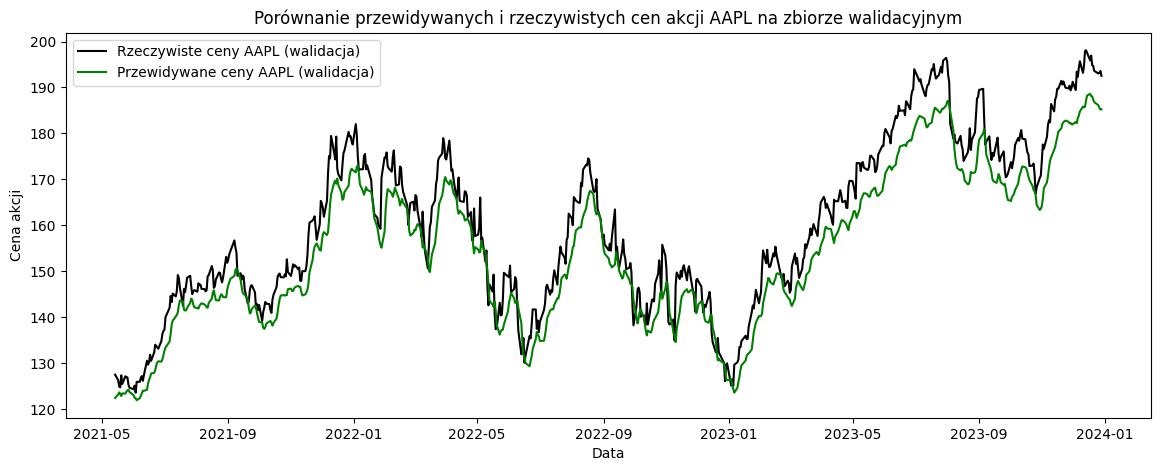

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


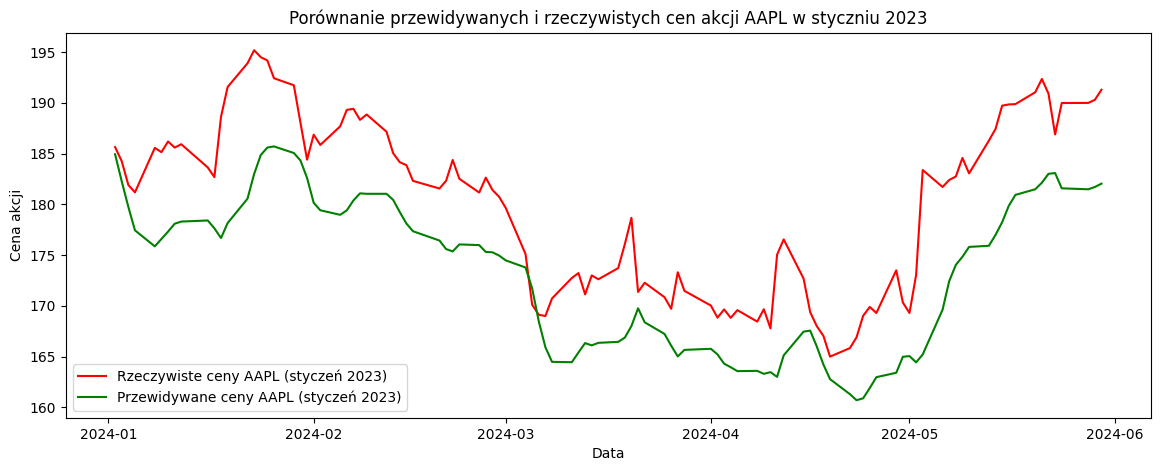

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Ustawienia wyświetlania wykresów
%matplotlib inline

# Pobranie danych od 01-01-2019 do 31-12-2022
df = yf.download('AAPL', start='2015-01-01', end='2023-12-31')

# Użyjemy tylko kolumny 'Close' jako cechy
data = df[['Close']].values

# Skalowanie danych do zakresu (0,1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Definiowanie funkcji do tworzenia sekwencji danych
def create_dataset(dataset, look_back=60):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

# Tworzenie sekwencji z look_back = 60 dni
look_back = 60
X, Y = create_dataset(scaled_data, look_back)

# Reshape danych wejściowych do formatu [próbki, timesteps, cechy]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Podział na zbiór treningowy i testowy (80% treningowy, 20% walidacyjny)
train_size = int(len(X) * 0.7)
X_train, X_val = X[:train_size], X[train_size:]
Y_train, Y_val = Y[:train_size], Y[train_size:]

# Budowa modelu LSTM
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.3))
model.add(LSTM(units=64))
model.add(Dropout(0.3))
model.add(Dense(25))
model.add(Dense(1))
model.summary()
model.compile(loss='mean_squared_error', optimizer='adam')

# Trenowanie modelu z walidacją
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_val, Y_val), verbose=1)

# Predykcja na zbiorze walidacyjnym
predicted_val = model.predict(X_val)
predicted_val = scaler.inverse_transform(predicted_val)
Y_val_inverse = scaler.inverse_transform(Y_val.reshape(-1, 1))

# Pobranie dat dla zbioru walidacyjnego
validation_dates = df.index[look_back + train_size:]

# Wykres porównujący na zbiorze walidacyjnym
plt.figure(figsize=(14,5))
plt.plot(validation_dates, Y_val_inverse, color='black', label='Rzeczywiste ceny AAPL (walidacja)')
plt.plot(validation_dates, predicted_val, color='green', label='Przewidywane ceny AAPL (walidacja)')
plt.title('Porównanie przewidywanych i rzeczywistych cen akcji AAPL na zbiorze walidacyjnym')
plt.xlabel('Data')
plt.ylabel('Cena akcji')
plt.legend()
plt.show()

# Pobranie danych do 31-12-2022 dla predykcji na styczeń 2023
train_data = yf.download('AAPL', start='2019-01-01', end='2023-12-31')
train_close = train_data[['Close']].values

# Pobranie danych od 01-01-2023 do 31-01-2023 (bez patrzenia na nie)
test_data = yf.download('AAPL', start='2024-01-01', end='2024-05-31')
actual_prices = test_data[['Close']].values

# Łączenie danych w celu zachowania ciągłości sekwencji
total_dataset = np.concatenate((train_close, actual_prices), axis=0)

# Przygotowanie danych do predykcji
inputs = total_dataset[len(total_dataset) - len(actual_prices) - look_back:]
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(look_back, len(inputs)):
    X_test.append(inputs[i-look_back:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predykcja cen na styczeń 2023
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Rzeczywiste ceny zamknięcia dla stycznia 2023
real_prices = test_data['Close'].values

# Daty dla stycznia 2023
test_dates = test_data.index

# Wykres porównujący dla stycznia 2023
plt.figure(figsize=(14,5))
plt.plot(test_dates, real_prices, color='red', label='Rzeczywiste ceny AAPL (styczeń 2023)')
plt.plot(test_dates, predicted_prices, color='green', label='Przewidywane ceny AAPL (styczeń 2023)')
plt.title('Porównanie przewidywanych i rzeczywistych cen akcji AAPL w styczniu 2023')
plt.xlabel('Data')
plt.ylabel('Cena akcji')
plt.legend()
plt.show()
